## Name: Michael Osei
***

### Question 1

In [43]:
from sklearn.datasets import load_boston

boston = load_boston()
print("Nr. of features: {}".format(len(boston.feature_names)))
print("|{:>7}|{:>7}|{:>7}|{:>10}|{:>10}|"
      .format('Mean___', 'Min___', 'Max___','Var___','Std___'))
for i in range(len(boston.feature_names)):
    print("|{:<7.2f}|{:<7.2f}|{:<7.2f}|{:<10.2f}|{:<10.2f}|"
          .format(boston.data[:,i].mean(),
                  boston.data[:,i].min(),
                  boston.data[:,i].max(),
                  boston.data[:,i].var(),
                  boston.data[:,i].std()))

Nr. of features: 13
|Mean___| Min___| Max___|    Var___|    Std___|
|3.59   |0.01   |88.98  |73.76     |8.59      |
|11.36  |0.00   |100.00 |542.86    |23.30     |
|11.14  |0.46   |27.74  |46.97     |6.85      |
|0.07   |0.00   |1.00   |0.06      |0.25      |
|0.55   |0.39   |0.87   |0.01      |0.12      |
|6.28   |3.56   |8.78   |0.49      |0.70      |
|68.57  |2.90   |100.00 |790.79    |28.12     |
|3.80   |1.13   |12.13  |4.43      |2.10      |
|9.55   |1.00   |24.00  |75.67     |8.70      |
|408.24 |187.00 |711.00 |28348.62  |168.37    |
|18.46  |12.60  |22.00  |4.68      |2.16      |
|356.67 |0.32   |396.90 |8318.28   |91.20     |
|12.65  |1.73   |37.97  |50.89     |7.13      |


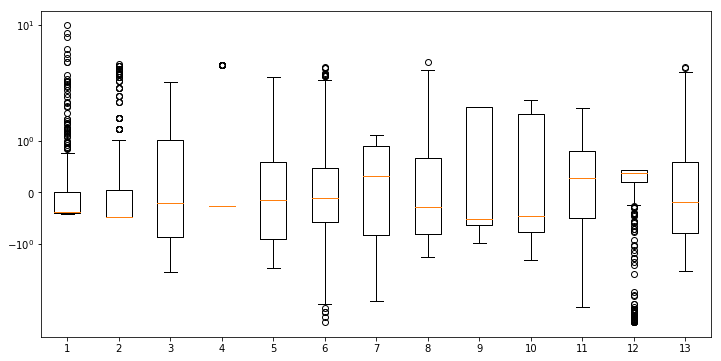

In [72]:
import matplotlib.pyplot as plt
import numpy as np

iq1 = np.percentile(boston.data, 0.25)
iq3 = np.percentile(boston.data, 0.75)
iqr = iq3 - iq1

plt.figure(figsize=(12,6))
plt.boxplot(boston.data, 0, whis=2.0)
plt.yscale('symlog')
plt.show()

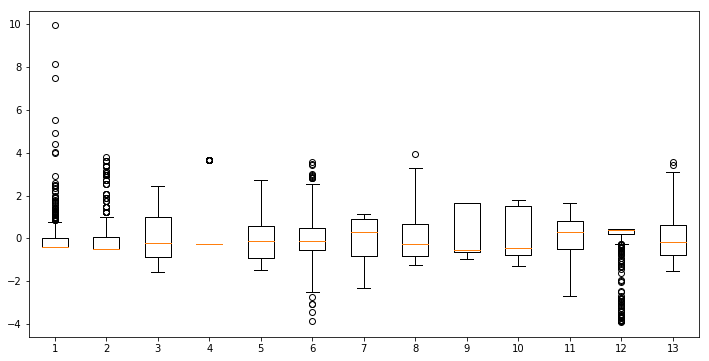

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(boston.data)
scaled_data = scaler.transform(boston.data)

plt.figure(figsize=(12,6))
plt.boxplot(scaled_data, 0, whis=2.0)
plt.show()

Applying Kmeans to data.

Initial centroids: [76.35783569480216, 839.6645089809211, 1952.1700156919192]


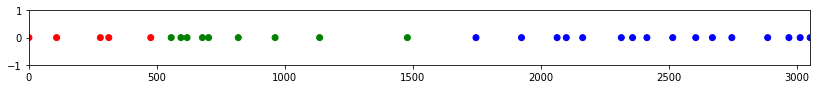

In [94]:
import random

from matplotlib import pyplot as plt

points1 = [0,108,279,312,476,556,594,618,678,702]
points2 = [818,962,1136,1479,1747,1925,2064,2100,2164,2315]
points3 = [2359,2415,2516,2606,2671,2747,2887,2970,3014,3053]
points = points1 + points2 + points3

n = len(points) # nr. of points
k = 3 # nr. of clusters

centroids = []
random.seed(42)
for i in range(k):
    centroids.append(random.uniform(points[0], points[-1]))
centroids.sort()
print('Initial centroids:', centroids)

n_iter = 10
for it in range(n_iter):
    closest = [0]*n
    '''Start kmeans iteration'''
    for i in range(n):
        distances = []
        for j in range(k):
            distances.append(abs(points[i] - centroids[j]))
        closest[i] = distances.index(min(distances))
    #print('Closest centroid:', closest, it)

    '''Find new centroids for each of k sets of points'''
    summation = [0]*k
    counter   = [0]*k

    for i in range(n):
        summation[closest[i]] += points[i]
        counter[closest[i]] += 1

    for j in range(k):
        if counter[j] == 0: print('Error - empty set')
        else: centroids[j] = summation[j]/float(counter[j])
    #print('New centroids: ', centroids)

color_map = closest
color_map = list(map(lambda x: 'r' if x == 0 else 'g' if x == 1 else 'b', color_map))
plt.figure(figsize=(14,1))
plt.ylim(-1, 1)
plt.xlim(0, points[-1])
plt.scatter(points, [0]*n,marker='o', color=color_map )
plt.show()
print([1,2,3] == [4,5,8])

In [ ]:
import random

from matplotlib import pyplot as plt

points1 = [0,108,279,312,476,556,594,618,678,702]
points2 = [818,962,1136,1479,1747,1925,2064,2100,2164,2315]
points3 = [2359,2415,2516,2606,2671,2747,2887,2970,3014,3053]
points = points1 + points2 + points3

n = len(points) # nr. of points
k = 3 # nr. of clusters

centroids = []
random.seed(42)
for i in range(k):
    centroids.append(random.uniform(points[0], points[-1]))
centroids.sort()
print('Initial centroids:', centroids)

n_iter = 10

diff_centroids = True
while diff_centroids:
    for it in range(n_iter):
        closest = [0]*n
        '''Start kmeans iteration'''
        for i in range(n):
            distances = []
            for j in range(k):
                distances.append(abs(points[i] - centroids[j]))
            closest[i] = distances.index(min(distances))
        #print('Closest centroid:', closest, it)

        '''Find new centroids for each of k sets of points'''
        summation = [0]*k
        counter   = [0]*k

        for i in range(n):
            summation[closest[i]] += points[i]
            counter[closest[i]] += 1

        for j in range(k):
            if counter[j] == 0: print('Error - empty set')
            else: centroids[j] = summation[j]/float(counter[j])
        #print('New centroids: ', centroids)
    if 

color_map = closest
color_map = list(map(lambda x: 'r' if x == 0 else 'g' if x == 1 else 'b', color_map))
plt.figure(figsize=(14,1))
plt.ylim(-1, 1)
plt.xlim(0, points[-1])
plt.scatter(points, [0]*n,marker='o', color=color_map )
plt.show()